In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('../../data/Travel.csv')

In [9]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as ex
%matplotlib inline

### Cleaning Data

In [12]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [13]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [14]:
def clean_gen(data):
    if data == 'Fe Male':
        return 'Female'
    else:
        return data
df['Gender'] = df['Gender'].apply(clean_gen)

In [15]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [16]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [17]:
def clean_status(data):
    if data == 'Single':
        return 'Unmarried'
    else:
        return data
df['MaritalStatus'] = df['MaritalStatus'].apply(clean_status)

In [18]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [19]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [20]:
import numpy as np
features_na = [features for features in df.columns if df[features].isnull().sum() >= 1]

for feature in features_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5),'% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [21]:
df[features_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [22]:
features_na

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [23]:
df.Age.fillna(df.Age.median(),inplace = True)

df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace = True)

df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace = True)

df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace = True)

df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

C:\Users\hanni\AppData\Local\Temp\ipykernel_1292\3035791389.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.median(),inplace = True)
C:\Users\hanni\AppData\Local\Temp\ipykernel_1292\3035791389.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [24]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [25]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [26]:
df.drop('CustomerID',axis = 1,inplace = True)

### Feature Extraction

In [27]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [28]:
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(['NumberOfChildrenVisiting','NumberOfPersonVisiting'],axis = 1,inplace = True)

In [29]:
num_features =  [feature for feature in df.columns if df[feature].dtype != 'O']
num_features

['ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'MonthlyIncome',
 'TotalVisiting']

In [30]:
cat_features =  [feature for feature in df.columns if df[feature].dtype == 'O']
cat_features

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [31]:
discrete_features =[feature for feature in num_features if len(df[feature].unique()) <= 30]
discrete_features

['ProdTaken',
 'CityTier',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'TotalVisiting']

In [32]:
cont_features =[feature for feature in num_features if len(df[feature].unique()) >= 30]
cont_features

['Age', 'DurationOfPitch', 'MonthlyIncome']

In [33]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'],axis = 1)
y = df['ProdTaken']

In [34]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [35]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [36]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop= 'first')

preprocessor = ColumnTransformer([
    ('OneHotEncoder',oh_transformer,cat_features),
    ('StandardScaler',numeric_transformer,num_features)
    ])

In [37]:
X_train = preprocessor.fit_transform(X_train)

In [38]:
X_test = preprocessor.transform(X_test)

### Model Training

In [39]:
!pip install xgboost


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [41]:
models={
    "Random Forest": RandomForestClassifier(),
    "Logistic_Regression": LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost Classifier' : AdaBoostClassifier(),
    'XGBoost Classifier': XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) 

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9284
- F1 score: 0.9226
- Precision: 0.9764
- Recall: 0.6492
- Roc Auc Score: 0.8227


Logistic_Regression
Model performance for Training set
- Accuracy: 0.8460
- F1 score: 0.8202
- Precision: 0.7016
- Recall: 0.3032
- Roc Auc Score: 0.6368
----------------------------------
Model performance for Test set
- Accuracy: 0.8364
- F1 score: 0.8087
- Precision: 0.6914
- Recall: 0.2932
- Roc Auc Score: 0.6307


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8939
- F1 score: 0.8819
- Precision: 0.8756
- Recall: 0.5021
- Roc Auc Score: 0.7429
----------------------------------
Model performance for Test set
- Accuracy: 0.8589
- F1 score: 0.8398
- Precision: 0.7732
- Recall: 0.3927
- Roc Auc Score: 0.6824


AdaBoost Classifier
Model performance for Tra

In [38]:
gradient_params = {
    'learning_rate': [0.1,0.3,0.5,0.7,0.99],
    'n_estimators': [100,10,50],
    'criterion':['friedman_mse', 'squared_error'],
    'min_samples_split': [2,5,6],
    'min_samples_leaf': [4,5,6],
    'max_depth': [3,5,7]
}

In [39]:
params = {
    'max_depth': [5,7,8,10,15,'auto'],
    'max_features': [5,7,8,'auto'],
    'min_samples_split':[2,8,15,20],
    'n_estimators': [100,200,500,1000]
}

In [41]:
randomcv_models = [
    ('RF',RandomForestClassifier(),params),
    ('GB',GradientBoostingClassifier(),gradient_params)
]

In [42]:
from sklearn.model_selection import RandomizedSearchCV

model_params = {}
for name , model , params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter = 100,cv = 3,verbose = 2,n_jobs = -1)
    random.fit(X_train,y_train)
    model_params[name] = random.best_params_

for model_name in model_params:
    print(f"------------- Best Params for {model_name} -------------")
    print(model_params[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\hanni\Desktop\NOTES\Semester 5\ML\ml_env\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
117 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hanni\Desktop\NOTES\Semester 5\ML\ml_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hanni\Desktop\NOTES\Semester 5\ML\ml_env\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\hanni\Desktop\NOTES\Semester 5\ML\ml_env\Lib\site-packages\sklearn\base.py", line 471, in _v

Fitting 3 folds for each of 100 candidates, totalling 300 fits
------------- Best Params for RF -------------
{'n_estimators': 500, 'min_samples_split': 8, 'max_features': 7, 'max_depth': 15}
------------- Best Params for GB -------------
{'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_depth': 7, 'learning_rate': 0.5, 'criterion': 'friedman_mse'}


In [51]:
xgboost_params = {
    'max_depth': [3,4,7],
    'learning_rate': [0.1,0.3,0.5],
    'n_estimators': [100,50,20],
}
randomcv_models = [
    ('XgBoost',XGBClassifier(),xgboost_params)
]

In [52]:
from sklearn.model_selection import RandomizedSearchCV

model_params = {}
for name , model , params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter = 100,cv = 3,verbose = 2,n_jobs = -1)
    random.fit(X_train,y_train)
    model_params[name] = random.best_params_

for model_name in model_params:
    print(f"------------- Best Params for {model_name} -------------")
    print(model_params[model_name])

c:\Users\hanni\Desktop\NOTES\Semester 5\ML\ml_env\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 27 candidates, totalling 81 fits
------------- Best Params for XgBoost -------------
{'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.5}


In [55]:
from sklearn.ensemble import AdaBoostClassifier
models={
    "Adaboost ": AdaBoostClassifier(),
    'Xgboost' : XGBClassifier(n_estimators= 100, max_depth= 7, learning_rate= 0.5,random_state = 42),
    "Gradient Boost":GradientBoostingClassifier(n_estimators=100,min_samples_leaf=6,min_samples_split=6,criterion='friedman_mse',max_depth=7,learning_rate=0.5,random_state = 42),
    "Random Forest":RandomForestClassifier(n_estimators= 100, min_samples_split= 2, max_features= 8, max_depth= 15,random_state = 42)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) 

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Adaboost 
Model performance for Training set
- Accuracy: 0.8478
- F1 score: 0.8146
- Precision: 0.7815
- Recall: 0.2551
- Roc Auc Score: 0.6194
----------------------------------
Model performance for Test set
- Accuracy: 0.8354
- F1 score: 0.7987
- Precision: 0.7500
- Recall: 0.2356
- Roc Auc Score: 0.6083


Xgboost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9499
- F1 score: 0.9482
- Precision: 0.9437
- Recall: 0.7906
- Roc Auc Score: 0.8896


Gradient Boost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9499
- F1 score: 0.9478
- Precision: 0.9610
- Recall: 0.7749
- Roc Auc Score: 0.8836


Random Forest
Model performance for Training set
- Accuracy: 0.9

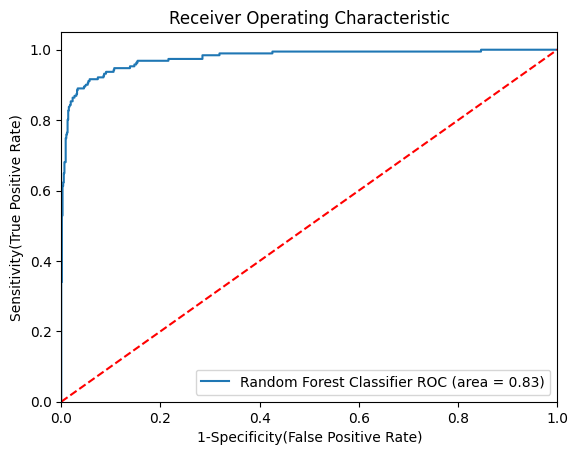

In [56]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators= 100, min_samples_split= 2, max_features= 8, max_depth= 15),
    'auc':  0.8313
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

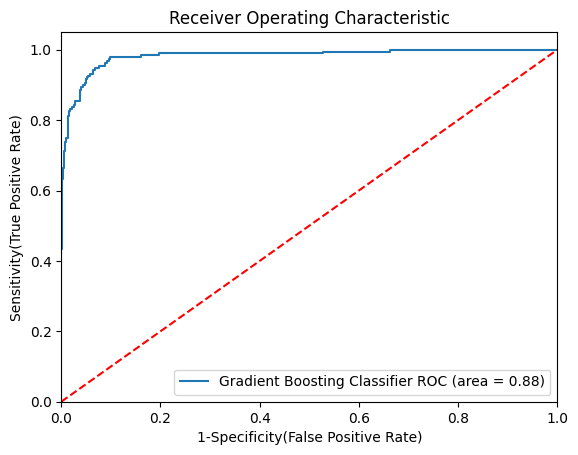

In [57]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Gradient Boosting Classifier',
    'model': GradientBoostingClassifier(n_estimators=100,min_samples_leaf=6,min_samples_split=6,criterion='friedman_mse',max_depth=7,learning_rate=0.5),
    'auc':  0.8836

},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

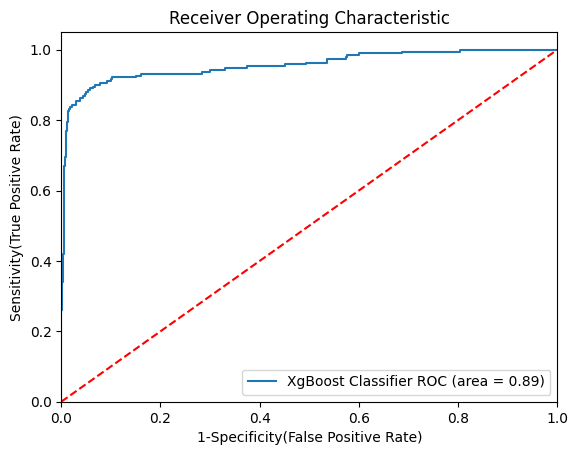

In [58]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'XgBoost Classifier',
    'model': XGBClassifier(n_estimators= 100, max_depth= 7, learning_rate= 0.5),
    'auc':  0.8896
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")